In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

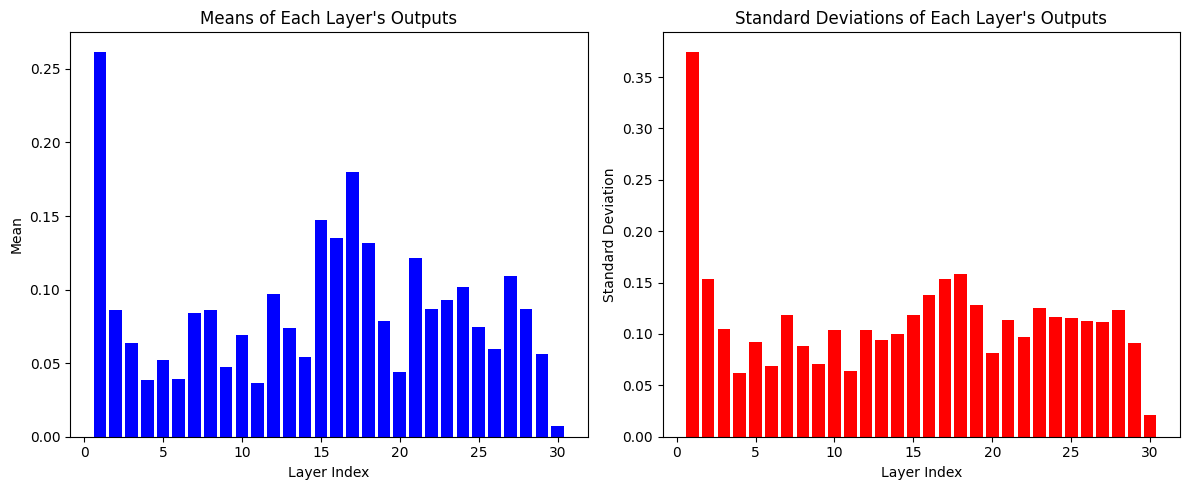

In [4]:
class NetWithoutBatchNorm(nn.Module):
    def __init__(self):
        super(NetWithoutBatchNorm, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(10, 10) for _ in range(30)])
        
    def forward(self, x, record_stats=False):
        means = []
        stds = []
        for layer in self.layers:
            x = layer(x)
            x = torch.relu(x)
            if record_stats:
                means.append(x.mean().item())
                stds.append(x.std().item())
        return x, means, stds

model = NetWithoutBatchNorm()
data = torch.randn(100, 10)

_, means, stds = model(data, record_stats=True)

x = list(range(1, 31))  # 1~30

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x, means, color='b')
plt.title("Means of Each Layer's Outputs")
plt.xlabel('Layer Index')
plt.ylabel('Mean')

plt.subplot(1, 2, 2)
plt.bar(x, stds, color='r')
plt.title("Standard Deviations of Each Layer's Outputs")
plt.xlabel('Layer Index')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


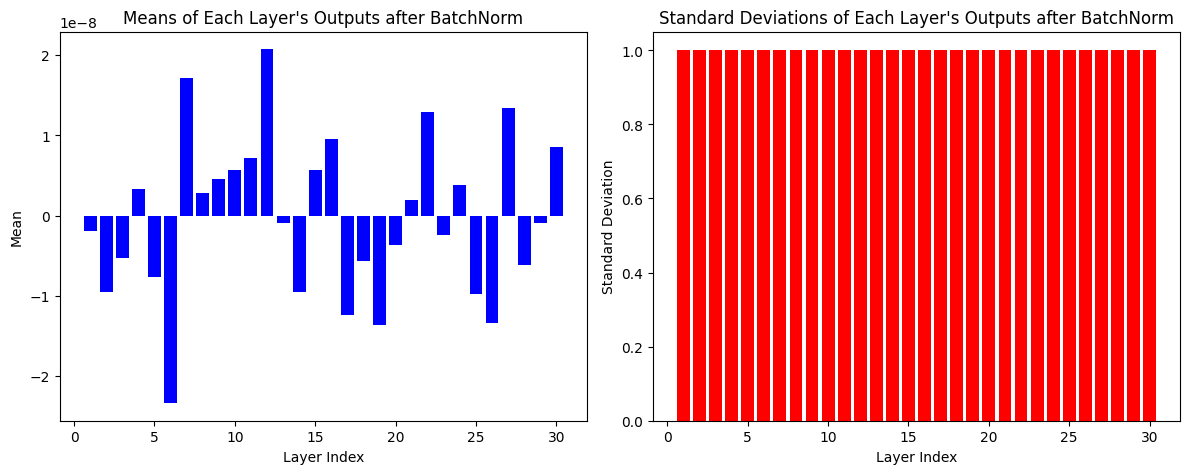

In [5]:
class NetWithBatchNorm(nn.Module):
    def __init__(self):
        super(NetWithBatchNorm, self).__init__()
        self.layers = nn.ModuleList([])
        for _ in range(30):
            self.layers.append(nn.Linear(10, 10))
            self.layers.append(nn.BatchNorm1d(10))
        
    def forward(self, x, record_stats=False):
        means = []
        stds = []
        for layer in self.layers:
            x = layer(x)
            if isinstance(layer, nn.BatchNorm1d) and record_stats:
                means.append(x.mean().item())
                stds.append(x.std().item())
            if isinstance(layer, nn.Linear):
                x = torch.relu(x)
        return x, means, stds

model = NetWithBatchNorm()
data = torch.randn(100, 10)

_, means, stds = model(data, record_stats=True)

x = list(range(1, 31))  # 1~30

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x, means, color='b')
plt.title("Means of Each Layer's Outputs after BatchNorm")
plt.xlabel('Layer Index')
plt.ylabel('Mean')

plt.subplot(1, 2, 2)
plt.bar(x, stds, color='r')
plt.title("Standard Deviations of Each Layer's Outputs after BatchNorm")
plt.xlabel('Layer Index')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()
